In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Environment Motor\n°OoO_FXCM_Oo0°\nLumberJack Jyss 5779(c)')
print('Version v0.025')

Global Optimized LumberJack Environment Motor
°OoO_FXCM_Oo0°
LumberJack Jyss 5779(c)
Version v0.025


In [1]:
print('Importing librairies...')
import fxcmpy
print('version fxcmpy :',fxcmpy.__version__)
import time
import numpy as np
import pandas as pd
import datetime as dt
import talib
from zigzag import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('seaborn')
%matplotlib inline

#import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
print('Librairies imported')

Importing librairies...
version fxcmpy : 1.2.4


Using TensorFlow backend.


Librairies imported


In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
TOKEN = 'e053ac1597cef331df9429ac8151100ea9f1c411' #token demo
server = 'demo'

# minutes: 'm1' , 'm5' , 'm15' , 'm30' 
# hours: 'H1' , 'H2', 'H3', 'H4', 'H6' 'H8'
# one day: 'D1'
# one week: 'W1'
# one month: 'M1'
ticker = 'SPX500' 
period = 'm1'
number = 10000
# Time Windows
# start = dt.datetime(2017, 7, 15)
# stop = dt.datetime(2017, 8, 1)
# con.get_candles('EUR/USD', period='D1',start=start, stop=stop)

In [6]:
tmps1=time.time()
print('Connecting server...')
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server= server)
if con.is_connected():
    print('Connection established for',con.get_account_ids(),' - Mode :',server)
else:
    print('Not connected')

#con.subscribe_market_data(ticker)
df = con.get_candles(instrument=ticker, period=period,number=number) #start=start,stop=stop)
data = pd.DataFrame()
data['Open'] = df['askopen']
data['High'] = df['askhigh']
data['Low'] = df['asklow']
data['Close'] = df['askclose']
data['Date'] = df.index
data = data[['Date'] + data.columns[:-1].tolist()]
df = data.copy()

tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

Connecting server...


E0618 15:24:34.325467 123145399750656 fxcmpy.py:2360] Socket returns an error: ('Connection aborted.', OSError("(54, 'ECONNRESET')",)).


ServerError: Can not connect to FXCM Server.

In [5]:
tmps1=time.time()
df.reset_index(inplace=True,drop=True)
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
dataset_1D = df.copy()
dataset_1D = dataset_1D.dropna()
rsi = talib.RSI(dataset_1D['Close'],timeperiod=2)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

Période d'étude :  10000
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  8000  jours 
Bloc 2 : 2000  jours


In [6]:
dataset_1D.head()

,Date,Open,High,Low,Close
0,2019-06-04 19:57:00,237.75,237.85,237.55,237.55
1,2019-06-04 19:58:00,237.55,237.55,237.45,237.45
2,2019-06-04 19:59:00,237.45,237.45,237.15,237.45
3,2019-06-04 20:00:00,237.45,237.45,236.95,237.05
4,2019-06-04 20:01:00,237.05,237.35,236.75,237.15


In [7]:
delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.001, -0.001)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)

bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

rsi5_list = []
rsi95_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi95_list.append(95 - rsi[i])
        rsi5_list.append(rsi[i] - 5)
    except:
        rsi95_list.append(0)
        rsi5_list.append(0)
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['RSI'] = rsi
dataset_1D['95 - RSI'] = np.array(rsi95_list)
dataset_1D['RSI - 5'] = np.array(rsi5_list)
dataset_1D['BBD_Delta_Up'] = bbdelta
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
dataset_1D['Forcast Oscillator'] = (forosc)
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,5] * dataset_1D.iloc[i,5]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > 0.00002 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -0.00001 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
dataset_1D['target_up'] = target_up  # target_up # abs(np.array(valley))#target_up
dataset_1D['target_down'] = target_down # target_down # abs(np.array(peak))#target_down
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)
df_1D = dataset_1D.copy()
df_1D = df_1D.iloc[:,1:]
df_1D['Date'] = df['Date']
df_1D = df_1D.dropna()
df_1D = df_1D[['Date'] + df_1D.columns[:-1].tolist()]
df_1D.reset_index(inplace=True,drop=True)
print('\n')
print('GOLEM begins Computing...')
print('\n')
delta = round(data.shape[0])
bloc1 = round(delta*0.80)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,'\nBloc 2 :',bloc2,' periods ')
print('First period :',data.iloc[0,0])
print('Split period :',data.iloc[bloc1-1,0])
print('Last period :',data.iloc[data.shape[0]-1,0])
print('\n')

X = df_1D.iloc[:,1:-3]
y_up = df_1D.iloc[:,-3].values
y_down = df_1D.iloc[:,-2].values

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y_up = np.array(y_up).reshape(-1,1)
y_down = np.array(y_down).reshape(-1,1)

Xtrain = X[:bloc1,:]
Xtest = X[bloc1:,:]
ytrain_up = y_up[:bloc1,:]
ytest_up = y_up[bloc1:,:]
ytrain_down = y_down[:bloc1,:]
ytest_down = y_down[bloc1:,:]

seed = 770
np.random.seed(seed)

ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

model_up = Sequential()
# Add an input layer 
model_up.add(Dense(23, activation='relu'))
# Add one hidden layer 
model_up.add(Dense(50, activation='relu'))
# Add an output layer 
model_up.add(Dense(1, activation='sigmoid'))

model_down = Sequential()
# Add an input layer 
model_down.add(Dense(23, activation='relu'))
# Add one hidden layer 
model_down.add(Dense(50, activation='relu'))
# Add an output layer 
model_down.add(Dense(1, activation='sigmoid'))

print('Processing move_up')
model_up.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_up = model_up.fit(Xtrain, ytrain_up,epochs=50, batch_size=32, verbose=0)
print('\n')
print('Processing move_down')
model_down.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_down = model_down.fit(Xtrain, ytrain_down,epochs=50, batch_size=32, verbose=0)
print('\n')
print('Computing done')
print('\n')

train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)

yhat_up = model_up.predict_classes(Xtest)
yhat_down = model_down.predict_classes(Xtest)

score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)

predict_up = model_up.predict(Xtest)
predict_down = model_down.predict(Xtest)

accuracy_up = accuracy_score(ytest_up, yhat_up)
accuracy_down = accuracy_score(ytest_down, yhat_down)

# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents : vrais_positifs/(vrais_positifs+faux_positifs)
precision_up = precision_score(ytest_up, yhat_up)  
precision_down = precision_score(ytest_down, yhat_down) 


# Recall : (vrai_positifs/(vrais_positifs+faux_négatifs))
recall_up = recall_score(ytest_up, yhat_up) 
recall_down = recall_score(ytest_down, yhat_down) 


#roc_up=roc_auc_score(ytest_up,yhat_up)
#roc_down=roc_auc_score(ytest_down,yhat_down)
print('\n')
print('RESULTATS UP\n')
print('Accuracy: %.2f%%' % (accuracy_up * 100.0))
print("Precision: %.2f%% " % (precision_up *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_up * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
#print("ROC: %.2f%% " % (roc_up *100))
# get probabilities for positive class

print(classification_report(ytest_up, yhat_up))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_up, yhat_up))

print('\n')
print('_______________________________________________________________________________________________________________________________________________________________\n')
print('RESULTATS DOWN\n')
print('Accuracy: %.2f%%' % (accuracy_down * 100.0))
print("Precision: %.2f%% " % (precision_down *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_down * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
#print("ROC: %.2f%% " % (roc_down *100))
# get probabilities for positive class

print(classification_report(ytest_down, yhat_down))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_down, yhat_down))
print('\n')

resultats = pd.DataFrame()
resultats['Date'] = df_1D.iloc[bloc1:,0]
resultats['Move Up'] = yhat_up
resultats['Confiance up'] = (predict_up)*100
resultats['Move Down'] = yhat_down
resultats['Confiance Down'] = (predict_down)*100
resultats['Actual'] = df_1D['target_value']

tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')



GOLEM begins Computing...


# of periods :  10000
On 80% - 20% slash : 
Bloc 1 :  8000 
Bloc 2 : 2000  periods 
First period : 2019-06-04 19:57:00
Split period : 2019-06-14 00:11:00
Last period : 2019-06-17 19:11:00


Processing move_up


Processing move_down


Computing done


1951/1951 [==============================] - 0s 13us/step


RESULTATS UP

Accuracy: 90.26%
Precision: 81.87%   => Discrimnination des vrais positifs parmi les faux positifs
Recall: 46.82%   => Positifs trouvés par Golem sur tous les positifs existants
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1652
           1       0.82      0.47      0.60       299

   micro avg       0.90      0.90      0.90      1951
   macro avg       0.86      0.72      0.77      1951
weighted avg       0.90      0.90      0.89      1951

[[1621   31]
 [ 159  140]]


_______________________________________________________________________________________________________________

In [8]:
resultats.head() #, resultats.iloc[:,1].sum(),resultats.iloc[:,3].sum()

,Date,Move Up,Confiance up,Move Down,Confiance Down,Actual
8000,2019-06-14 01:15:00,0,16.775890,0,0.050813,254.55
8001,2019-06-14 01:16:00,1,92.764931,0,0.000000,253.85
8002,2019-06-14 01:17:00,0,0.000000,1,82.632149,254.25
8003,2019-06-14 01:18:00,1,85.388847,0,0.000000,253.95
8004,2019-06-14 01:19:00,0,10.981739,0,15.571353,254.05


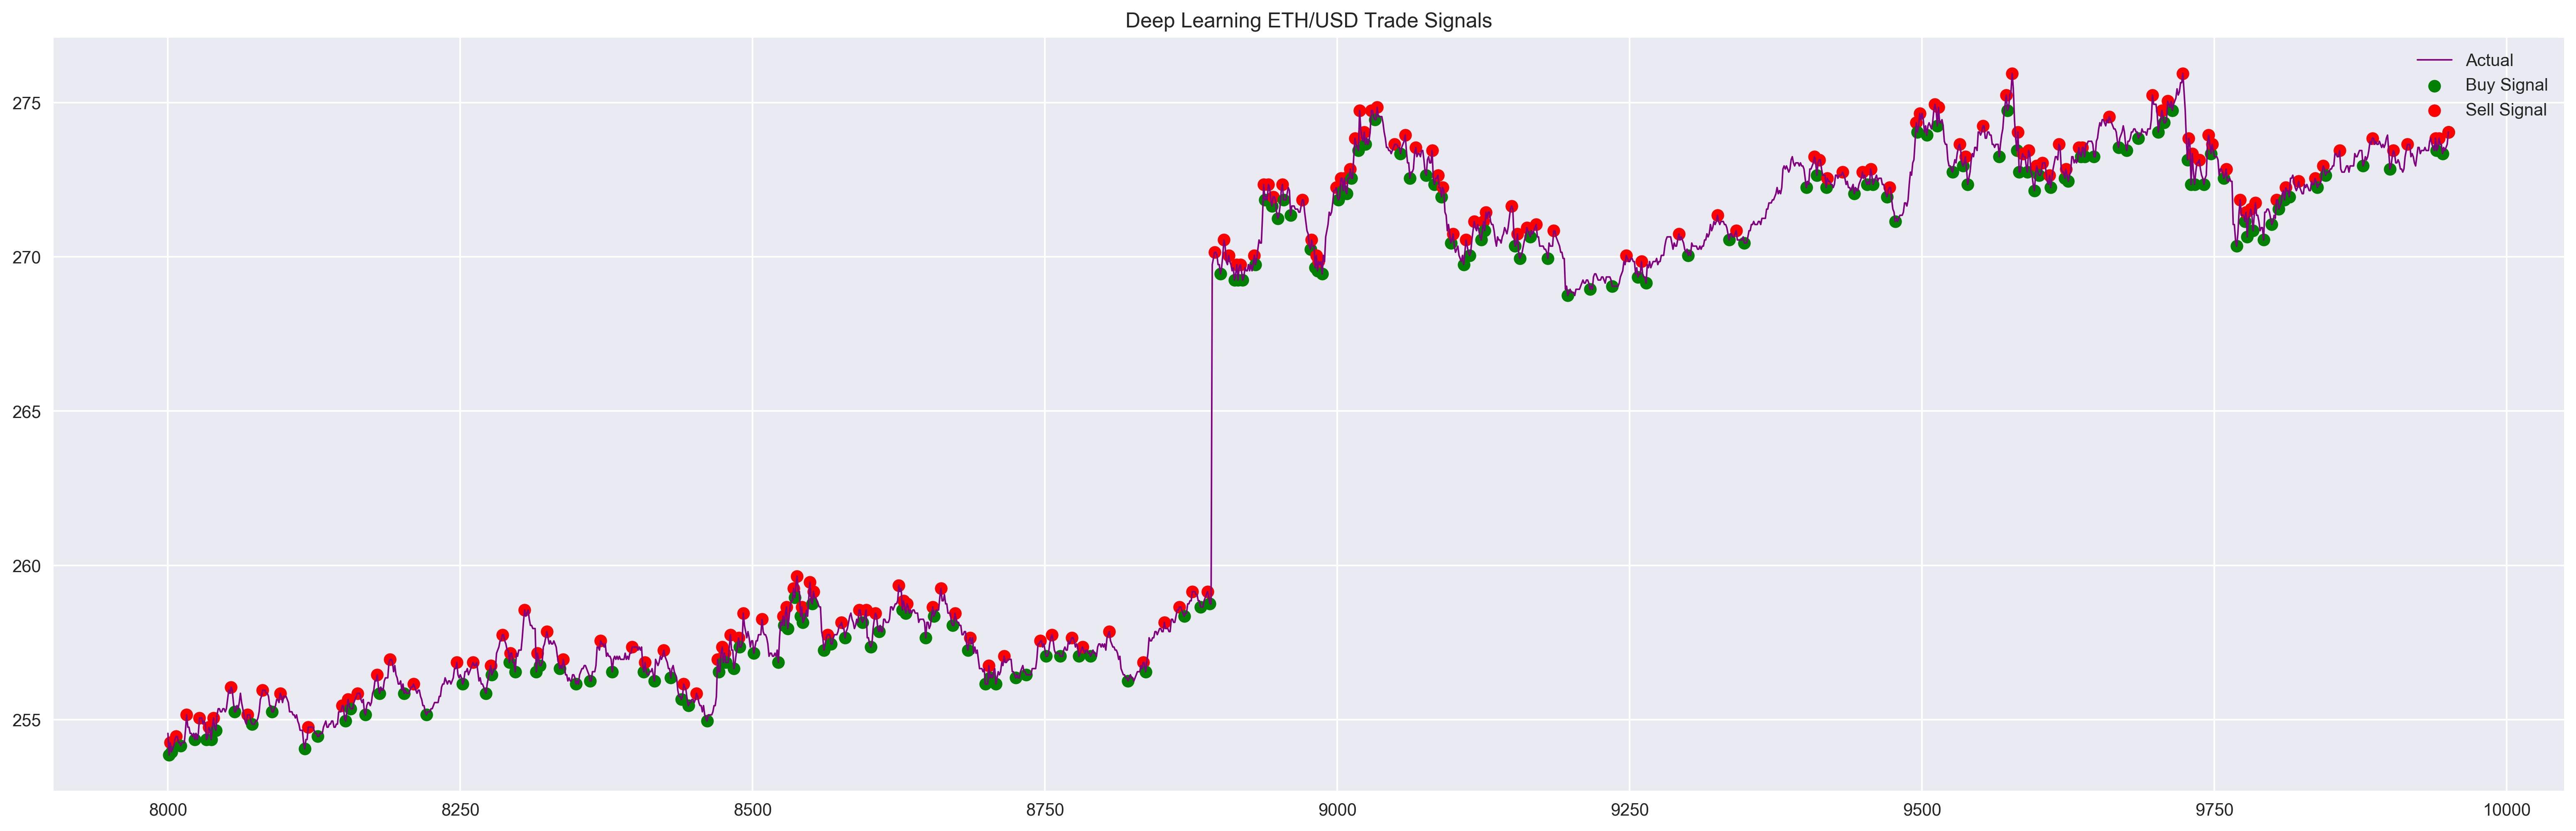

In [9]:
#resultats.set_index('Date',inplace=True)
#parse_dates=resultats['Date']
plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.title('Deep Learning '+ticker+' Trade Signals')
plt.plot(resultats['Actual'],color='purple',lw=0.9)
a = -1
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='g',marker='o')
    elif resultats.iloc[a,3] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='r',marker='o')

plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='g',marker='o',label='Buy Signal')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='r',marker='o',label='Sell Signal')
plt.legend()

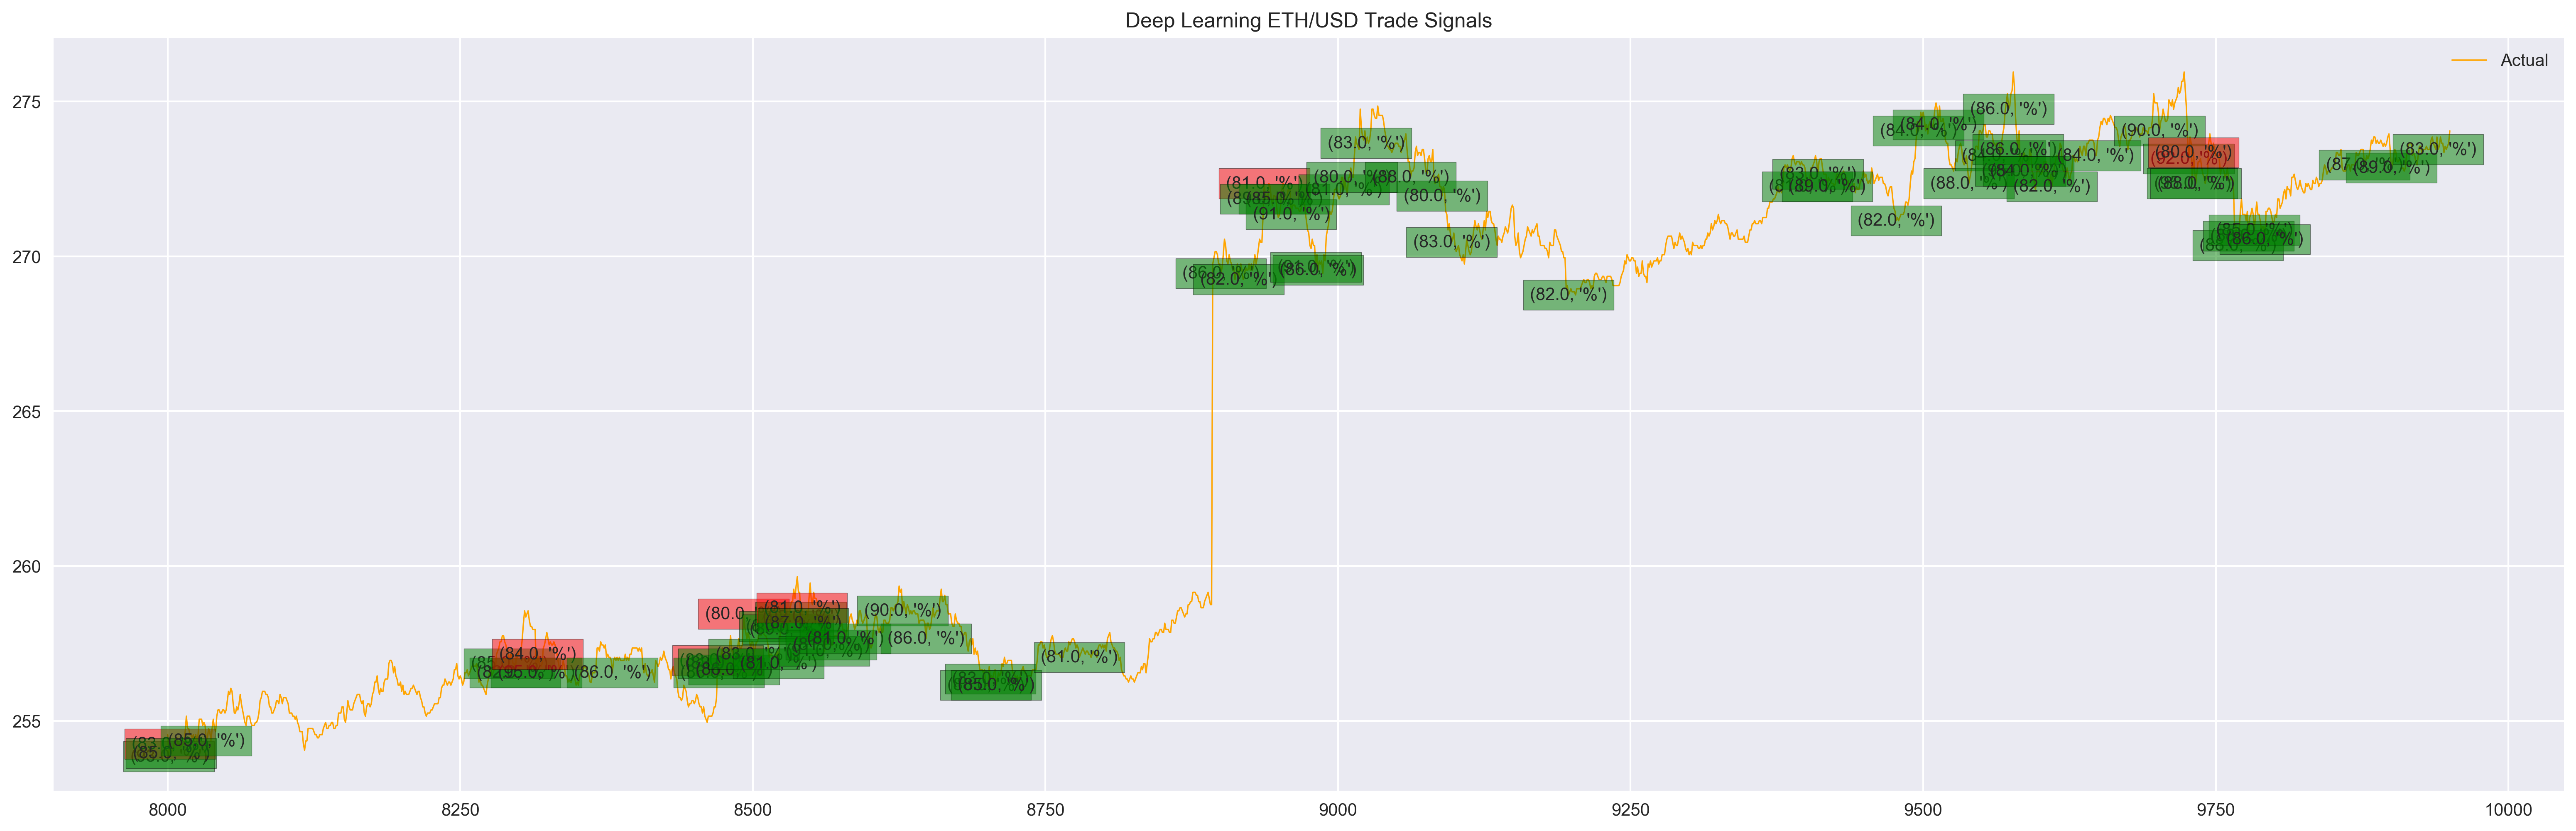

In [10]:
plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.title('Deep Learning '+ticker+' Trade Signals')
plt.plot(resultats['Actual'],color='orange',lw=0.8)
a = -1
proba = 80
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1 and resultats.iloc[i,2] > proba:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5],s=(round(resultats.iloc[i,2]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='green', alpha=0.5))
    elif resultats.iloc[a,3] == 1and resultats.iloc[i,4] > proba:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5],s=(round(resultats.iloc[i,4]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='red', alpha=0.5))
plt.legend()

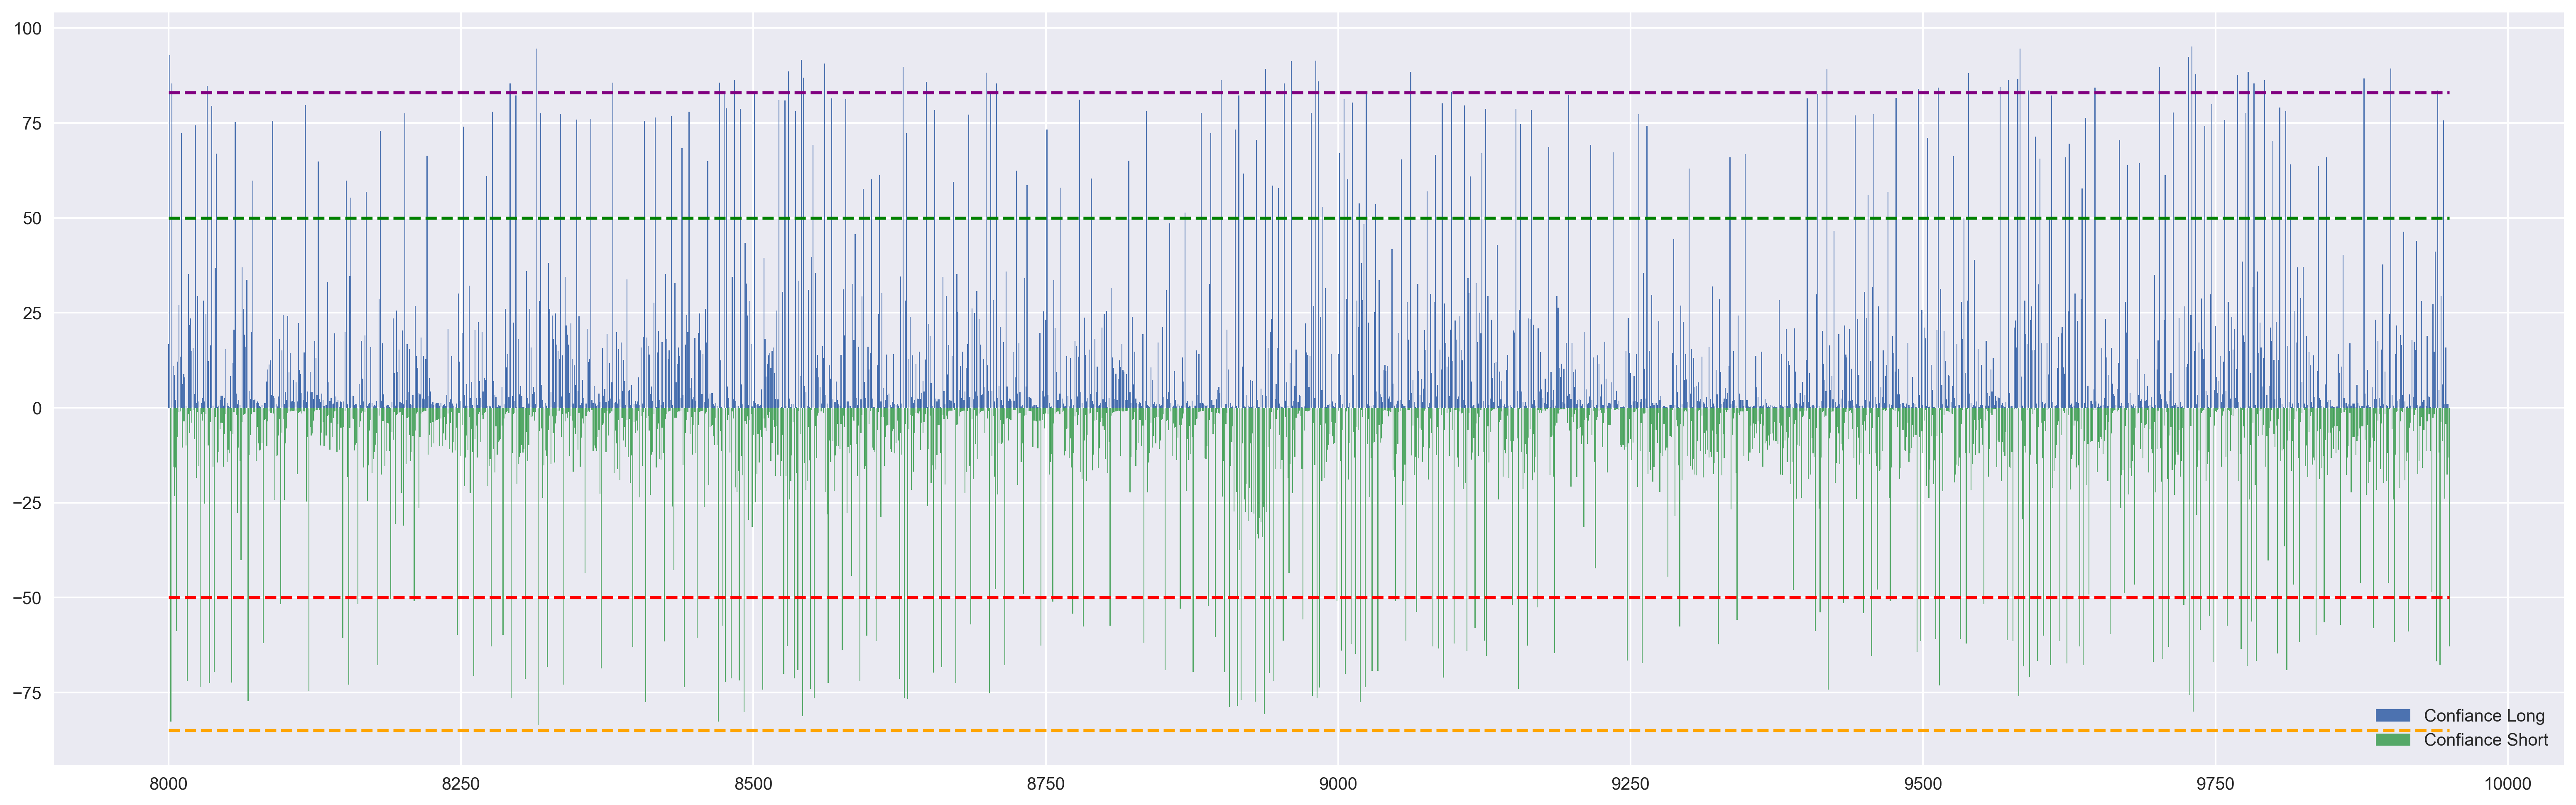

In [11]:
plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.bar(x=resultats.index,height=resultats['Confiance up'],label='Confiance Long')
plt.bar(x=resultats.index,height=-resultats['Confiance Down'],label='Confiance Short')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=50,color='g',linestyles='--')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=-50,color='r',linestyles='--')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=83,color='purple',linestyles='--')
plt.hlines(xmin=resultats.index[0],xmax=resultats.index[-1],y=-85,color='orange',linestyles='--')
plt.legend()

In [12]:
a = -1
pos_long = 0
pos_short = 0
pactol = 100000
price_buy = 0
price_sell = 0
x = 0
winners = []
loosers = []
nb_win = 0
nb_los = 0
mini_pnl = 0
pos_duration = []
average_duration = resultats.iloc[0,0] - resultats.iloc[0,0]
proba = 80

for i in range(0,len(resultats)):
    a+=1
    if pos_long == 0 and pos_short == 0 and resultats.iloc[a,1] == 1 and resultats.iloc[a,2] > proba:
        pos_long = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        price_buy = resultats.iloc[a,5]
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', achat de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
    
    elif pos_long == 1 and resultats.iloc[a,3] == 1 and resultats.iloc[a,4] > proba:
        old_pactol = pactol
        #pactol = pactol + (x * resultats.iloc[a,5])
        
        price_sell = resultats.iloc[a,5]
        mini_pnl = x*(price_sell-price_buy)
        pactol = pactol + mini_pnl
        print('\n Le ',str(resultats.iloc[a,0]),', vente pour close de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        print('pnl:', mini_pnl)
        print('prixe de vente',price_sell)
        print('prix d achat',price_buy)
        #mini_pnl = pactol - old_pactol - 100000
        
        pos_duration.append(resultats.iloc[a,0] - time_enter)
        price_buy=0
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1
        pos_short = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', vente de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        pos_long = 0
        #x = 0
        
    elif pos_short == 0 and pos_long == 0 and resultats.iloc[a,3] == 1 and resultats.iloc[a,4] > proba:
        pos_short = 1
        x = 100000/resultats.iloc[a,5]
        price_sell = resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', vente de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
    
    elif pos_short == 1 and resultats.iloc[a,1] == 1 and resultats.iloc[a,2] > proba:
        old_pactol = pactol
        #pactol = pactol + (x * resultats.iloc[a,5])
     
        price_buy=resultats.iloc[a,5]
        mini_pnl = x*(price_sell-price_buy)
        pactol = pactol + mini_pnl
        print('\n Le ',str(resultats.iloc[a,0]),', achat pour close de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        
        print('prixe de vente',price_sell)
        print('prix d achat',price_buy)
        #mini_pnl = pactol - old_pactol - 100000
        
        print('pnl:', mini_pnl)
        pos_duration.append(resultats.iloc[a,0] - time_enter)
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1
        pos_long = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', achat de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        pos_short = 0
        #x = 0

        
if pos_long == 1:
    print('Cutting non resolved position')
    x = round(100000/resultats.iloc[a,5])
    #pactol = pactol + (x * resultats.iloc[a,5])
    #mini_pnl = pactol - old_pactol - 100000
    price_sell = resultats.iloc[a,5]
    mini_pnl = x*(price_sell-price_buy)
    pactol = pactol + mini_pnl
    print('pnl',mini_pnl)
    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1
    x = 0

if pos_short == 1:
    print('Cutting non resolved position')
    x = round(100000/resultats.iloc[a,5])
    #pactol = pactol + (x * resultats.iloc[a,5])
    #mini_pnl = pactol - old_pactol - 100000
    price_buy=resultats.iloc[a,5]
    mini_pnl = x*(price_sell-price_buy)
    pactol = pactol + mini_pnl
    print('pnl',mini_pnl)
    
    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1
    x = 0    


for t in range(0,len(pos_duration)):
    average_duration = average_duration + pos_duration[t]
average_duration = average_duration/(nb_los+nb_win)
               

pnl = round(pactol - 100000,2)
print('\n Begining of BackTest :',resultats.iloc[0,0])
print('Instrument :',ticker)
print('Face value per trade : $100,000')
print('End of BackTest :',resultats.iloc[-1,0])
duration = resultats.iloc[-1,0] - resultats.iloc[0,0]
print("BackTest's period :",duration)
print( 'pnl :',pnl,'$')
print('Total winners :',round(sum(winners),2),'$')
print('Total loosers :',round(sum(loosers),2),'$')
print('Number of winners :',nb_win)
print('Number of loosers :',nb_los)
print('% winners :', round((nb_win/(nb_win+nb_los) * 100),2),'%')
print('Average winners :',(sum(winners)/(nb_win)))
try:
    print('Average losers :',(sum(loosers)/(nb_los)))
except:
    print('Average losers : Inf')
print('Average Duration :', average_duration)
print('Profit Factor : ',abs(round((sum(winners)/sum(loosers)),2)))

        
        


 Le  2019-06-14 01:16:00 , achat de  393.9334252511326  actions à 253.85 $
Nouveau pactol :  100000

 Le  2019-06-14 01:17:00 , vente pour close de  393.9334252511326  actions à 254.25 $
Nouveau pactol :  100157.57337010045
pnl: 157.57337010045526
prixe de vente 254.25
prix d achat 253.85

 Le  2019-06-14 01:17:00 , vente de  393.31366764995084  actions à 254.25 $
Nouveau pactol :  100157.57337010045

 Le  2019-06-14 01:18:00 , achat pour close de  393.31366764995084  actions à 253.95 $
Nouveau pactol :  100275.56747039544
prixe de vente 254.25
prix d achat 253.95
pnl: 117.99410029498972

 Le  2019-06-14 01:18:00 , achat de  393.7783028155149  actions à 253.95 $
Nouveau pactol :  100275.56747039544

 Le  2019-06-14 08:42:00 , vente pour close de  393.7783028155149  actions à 257.15 $
Nouveau pactol :  101535.65803940508
pnl: 1260.0905690096433
prixe de vente 257.15
prix d achat 253.95

 Le  2019-06-14 08:42:00 , vente de  388.8780867198134  actions à 257.15 $
Nouveau pactol :  101535.

In [13]:
pactol,old_pactol,mini_pnl

(111323.16722687108, 110336.83587512423, 0)

In [14]:
type(resultats)


pandas.core.frame.DataFrame

In [15]:
resultats.iloc[0:,0:]

,Date,Move Up,Confiance up,Move Down,Confiance Down,Actual
8000,2019-06-14 01:15:00,0,16.775890,0,0.050813,254.55
8001,2019-06-14 01:16:00,1,92.764931,0,0.000000,253.85
8002,2019-06-14 01:17:00,0,0.000000,1,82.632149,254.25
8003,2019-06-14 01:18:00,1,85.388847,0,0.000000,253.95
8004,2019-06-14 01:19:00,0,10.981739,0,15.571353,254.05
8005,2019-06-14 01:20:00,0,8.629981,0,23.336256,254.15
8006,2019-06-14 01:21:00,0,2.056554,0,15.748042,254.35
8007,2019-06-14 01:22:00,0,0.000000,1,58.817631,254.45
8008,2019-06-14 01:23:00,0,12.137455,0,7.808998,254.45
8009,2019-06-14 01:24:00,0,27.057426,0,1.137033,254.25


In [16]:
len(resultats)

1951

In [17]:
count_buy=[]
count_sell=[]
a=-1
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1 and resultats.iloc[i,2] > 90:
        count_buy.append(1)
        print('buy',resultats.iloc[i,0],resultats.iloc[i,5])
    if resultats.iloc[a,3] == 1 and resultats.iloc[i,4] > 90:
        count_sell.append(1)    
        print('sell',resultats.iloc[i,0],resultats.iloc[i,5])
print(count_buy)
print(count_sell)
        

buy 2019-06-14 01:16:00 253.85
buy 2019-06-14 08:40:00 256.55
buy 2019-06-14 13:53:00 258.35
buy 2019-06-14 14:17:00 257.25
buy 2019-06-16 23:24:00 271.35
buy 2019-06-16 23:52:00 269.65
buy 2019-06-17 12:21:00 272.75
buy 2019-06-17 15:03:00 273.15
buy 2019-06-17 15:06:00 272.35
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[]
